In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

In [20]:
# 读取数据集
data = pd.read_csv("raw_price_train/1_r_price_train.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,2012/9/5,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,2012/9/6,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,2012/9/7,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,2012/9/10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500


In [21]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012/9/4,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,2012/9/5,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,2012/9/6,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,2012/9/7,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,2012/9/10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500
5,2012/9/11,95.015717,95.728569,93.785713,94.370003,85.265068,125995800
6,2012/9/12,95.264282,95.699997,93.714287,95.684288,86.452538,178058300
7,2012/9/13,96.767143,97.928574,96.395714,97.568573,88.155037,149590000
8,2012/9/14,98.565712,99.568573,98.269997,98.754288,89.226341,150118500
9,2012/9/17,99.907143,99.971428,99.230003,99.968575,90.323479,99507800


 # 数据预处理

In [24]:
def preprocess(data,m):
    '''
    data: the dataframe of stock price
    m: the length of sequence
    '''
    adj_close = data["Adj Close"].tolist()
    #
    res_X = []
    res_y = []
    # 剔除前4个元素
    for i in range(4,len(adj_close)-m):
        res_X.append(adj_close[i:i+m])
        res_y.append(adj_close[i+m])
    return res_X,res_y

In [64]:
# 处理数据 m为子序列长度
m = 5
X,y = preprocess(data,m)

In [84]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = 0.3)

In [85]:
# 训练模型
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
model.score(X_test,y_test)

0.9953346522617967

In [87]:
y_est = model.predict(X_test)

In [88]:
np.power(y_test-y_est,2).mean()

2.3515551728102673

In [89]:
import matplotlib.pyplot as plt 

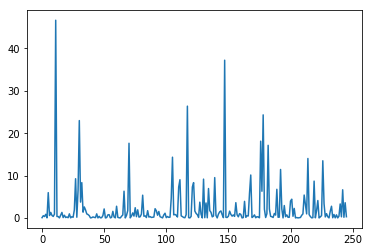

In [90]:
plt.plot(np.power(y_test-y_est,2))